# TOD MapSeq polyA analysis

The idea is to look at the raw sequencing reads from the Map-seq data for the TOD-S1 and TOD-S7 constructs.

We begin by reading in the raw data and extracting the polyA sequences. This is done by grabbing the sequences between the flanking regions of the polyA.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import os
from itertools import islice

In [16]:
# Set up reference sequences
S1_seq = "GGAAAAGGCGTCGAGTAGACGCCAACAACGGAAACCTGAAAGATCAAAAAAAAAAAGATCAAGTACAAAAAAAAAAAGTACAACAGGAAAAAAAAAAAGCATAGGTTCGCCTATGCAAACCAAACCGTCAGCGAGTAGCTGACAAAAAGAAACAACAAC"
S7_seq = "GGAAAAGGCGTCGAGTAGACGCCAACAACGGAAACCTGAAAGATCAAAAAACAAAAGATCAAGTACAAAAAACAAAAGTACAACAGGAAAAAACAAAAGCATAGGTTCGCCTATGCAAACCAAACCGTCAGCGAGTAGCTGACAAAAAGAAACAACAACAACAAC"

In [17]:
# Load in R1 fastq and load in the regions between flanking sequences
from itertools import islice
def load_polyas(r1_path, flanking_sequences):
    print("Loading sequences from: " + r1_path)
    r1_sequences = []

    with open(r1_path) as f:
        for line in islice(f, 1, None, 4):
            r1_sequences.append(line.strip())

            polyA_sequences = []
    for seq in r1_sequences:
        i = seq.find(flanking_sequences[0])
        j = seq.find(flanking_sequences[1])
        k = seq.find(flanking_sequences[2])
        l = seq.find(flanking_sequences[3])
        if i >= 0 and j >= 0 and k >= 0 and l >= 0:
            read_polyAs = [
                              seq[i + len(flanking_sequences[0]):j],
                              seq[j + len(flanking_sequences[1]):k],
                              seq[k + len(flanking_sequences[2]):l]
                          ]
            polyA_sequences.append(read_polyAs)
    
    return polyA_sequences

In [18]:
# Set up list of dictionaries to store data for each sample
S1_experiments = [
    {
     "Name": "SSII NM",
     "Barcode": "ACCAGGCGCTGG"
    },
    {
     "Name": "SSII DMS",
     "Barcode": "GATTACAAATTC"
    },
    {
     "Name": "SSII+Mn NM",
     "Barcode": "GAGGCCTTGGCC"
    },
    {
     "Name": "SSII+Mn DMS",
     "Barcode": "ACCAGTTTTAAT"
    },
    {
     "Name": "SSIII NM",
     "Barcode": "CTTTAAAATATA"
    },
    {
     "Name": "SSIII DMS",
     "Barcode": "CGGGCACGGCGG"
    },
    {
     "Name": "SSIV NM",
     "Barcode": "TGACTTGCACAT"
    },
    {
     "Name": "SSIV DMS",
     "Barcode": "TTACTGGCCGCA"
    },
    {
     "Name": "TGIRT NM",
     "Barcode": "TGCGCCATTGCT"
    },
    {
     "Name": "TGIRT DMS",
     "Barcode": "CTAGCAATGTGA"
    },
    {
     "Name": "Marathon NM",
     "Barcode": "ACAAAATGGTGG"
    },
    {
     "Name": "Marathon DMS",
     "Barcode": "GCCATGCCAACC"
    },
    {
     "Name": "AMV NM",
     "Barcode": "CTGCGTGCAAAC"
    },
    {
     "Name": "AMV DMS",
     "Barcode": "TAGTACTGCCAG"
    },
    {
     "Name": "MMLV NM",
     "Barcode": "GATTTGCACCTA"
    },
    {
     "Name": "MMVL DMS",
     "Barcode": "AGTCGTGATGTT"
    },
]

S7_experiments = [
    {
     "Name": "SSII NM",
     "Barcode": "ACCAGGCGCTGG"
    },
    {
     "Name": "SSII DMS",
     "Barcode": "GATTACAAATTC"
    },
    {
     "Name": "SSII+Mn NM",
     "Barcode": "GAGGCCTTGGCC"
    },
    {
     "Name": "SSII+Mn DMS",
     "Barcode": "ACCAGTTTTAAT"
    },
    {
     "Name": "SSIII NM",
     "Barcode": "CTTTAAAATATA"
    },
    {
     "Name": "SSIII DMS",
     "Barcode": "CGGGCACGGCGG"
    },
    {
     "Name": "SSIV NM",
     "Barcode": "TGACTTGCACAT"
    },
    {
     "Name": "SSIV DMS",
     "Barcode": "TTACTGGCCGCA"
    },
    {
     "Name": "TGIRT NM",
     "Barcode": "TGCGCCATTGCT"
    },
    {
     "Name": "TGIRT DMS",
     "Barcode": "CTAGCAATGTGA"
    },
    {
     "Name": "Marathon NM",
     "Barcode": "ACAAAATGGTGG"
    },
    {
     "Name": "Marathon DMS",
     "Barcode": "GCCATGCCAACC"
    },
    {
     "Name": "AMV NM",
     "Barcode": "CTGCGTGCAAAC"
    },
    {
     "Name": "AMV DMS",
     "Barcode": "TAGTACTGCCAG"
    },
    {
     "Name": "MMLV NM",
     "Barcode": "GATTTGCACCTA"
    },
    {
     "Name": "MMVL DMS",
     "Barcode": "AGTCGTGATGTT"
    },
]

In [19]:
# Load polyAs for S1 and S7
for i, experiment in enumerate(S1_experiments):
    polyA_sequences = load_polyas(os.path.join('demultiplexed', experiment['Barcode'], "SampleTruSeq1_S1_L001_R2_001.fastq"), ['CCTGAAAGATC', 'GATCAAGTAC', 'GTACAACAGG', 'GCATAGGTTCGC'])
    S1_experiments[i]['polyA_sequences'] = polyA_sequences

for i, experiment in enumerate(S7_experiments):
    polyA_sequences = load_polyas(os.path.join('demultiplexed', experiment['Barcode'], "SampleTruSeq2_S2_L001_R2_001.fastq"), ['CCTGAAAGATC', 'GATCAAGTAC', 'GTACAACAGG', 'GCATAGGTTCGC'])
    S7_experiments[i]['polyA_sequences'] = polyA_sequences

Loading sequences from: demultiplexed/ACCAGGCGCTGG/SampleTruSeq1_S1_L001_R2_001.fastq
Loading sequences from: demultiplexed/GATTACAAATTC/SampleTruSeq1_S1_L001_R2_001.fastq
Loading sequences from: demultiplexed/GAGGCCTTGGCC/SampleTruSeq1_S1_L001_R2_001.fastq
Loading sequences from: demultiplexed/ACCAGTTTTAAT/SampleTruSeq1_S1_L001_R2_001.fastq
Loading sequences from: demultiplexed/CTTTAAAATATA/SampleTruSeq1_S1_L001_R2_001.fastq
Loading sequences from: demultiplexed/CGGGCACGGCGG/SampleTruSeq1_S1_L001_R2_001.fastq
Loading sequences from: demultiplexed/TGACTTGCACAT/SampleTruSeq1_S1_L001_R2_001.fastq
Loading sequences from: demultiplexed/TTACTGGCCGCA/SampleTruSeq1_S1_L001_R2_001.fastq
Loading sequences from: demultiplexed/TGCGCCATTGCT/SampleTruSeq1_S1_L001_R2_001.fastq
Loading sequences from: demultiplexed/CTAGCAATGTGA/SampleTruSeq1_S1_L001_R2_001.fastq
Loading sequences from: demultiplexed/ACAAAATGGTGG/SampleTruSeq1_S1_L001_R2_001.fastq
Loading sequences from: demultiplexed/GCCATGCCAACC/Sam

In [21]:
def plot_polyA_lengths(experiments, axis, index):
    colors = ['blue', 'red']
    for i, experiment in enumerate(experiments):
        polyA_lengths = [len(x[index]) for x in experiment['polyA_sequences']]
        sns.distplot(polyA_lengths, hist=True, kde=False, hist_kws={'density': True} ,label=experiment['Name'], bins=np.arange(min(polyA_lengths), max(polyA_lengths)+1), ax=axis, color=colors[i])
        axis.set_xlim([6,14])
    axis.axvline(x=11.5, color='k', linestyle='--', label='Expected polyA length')
        
def polyA_lengths_summary(experiments, axes, title):
    plot_polyA_lengths(experiments, axs[0], 0)
    plot_polyA_lengths(experiments, axs[1], 1)
    plot_polyA_lengths(experiments, axs[2], 2)
    axs[0].legend()
    axs[0].set_title(title)
    plt.xlabel('polyA length')
    plt.rcParams.update({'font.size': 22})

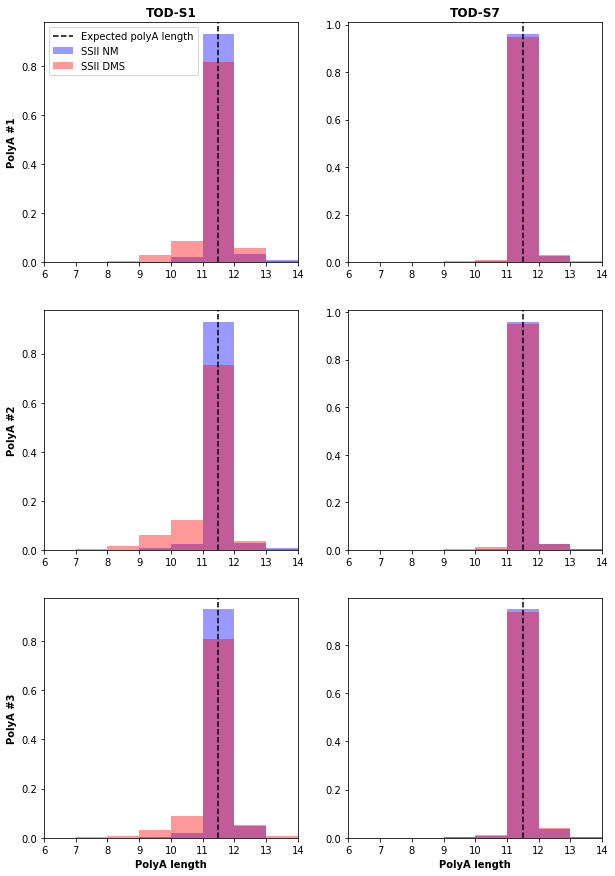

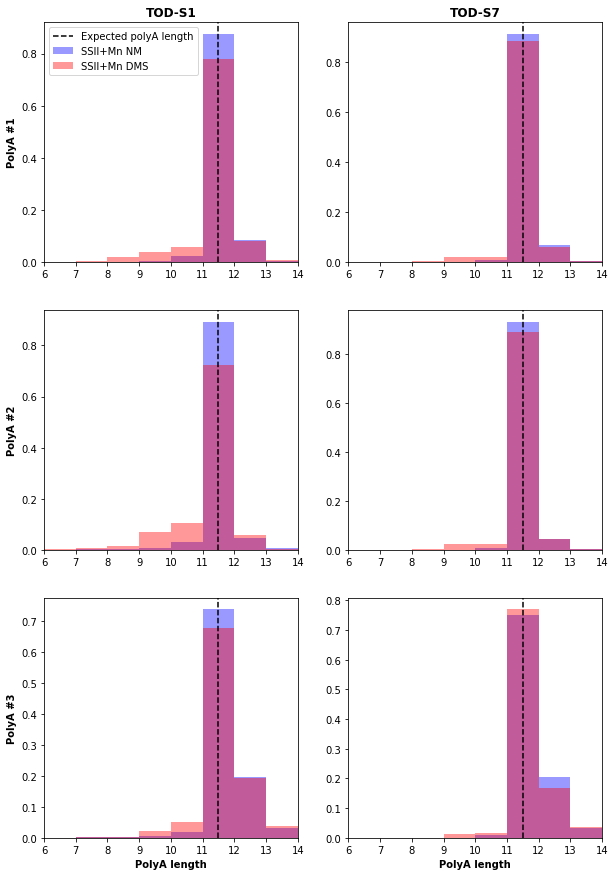

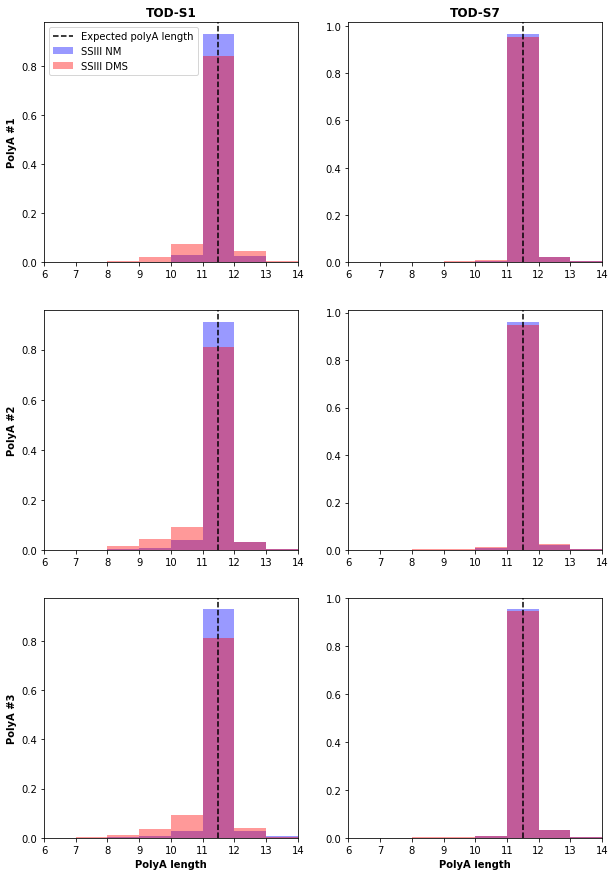

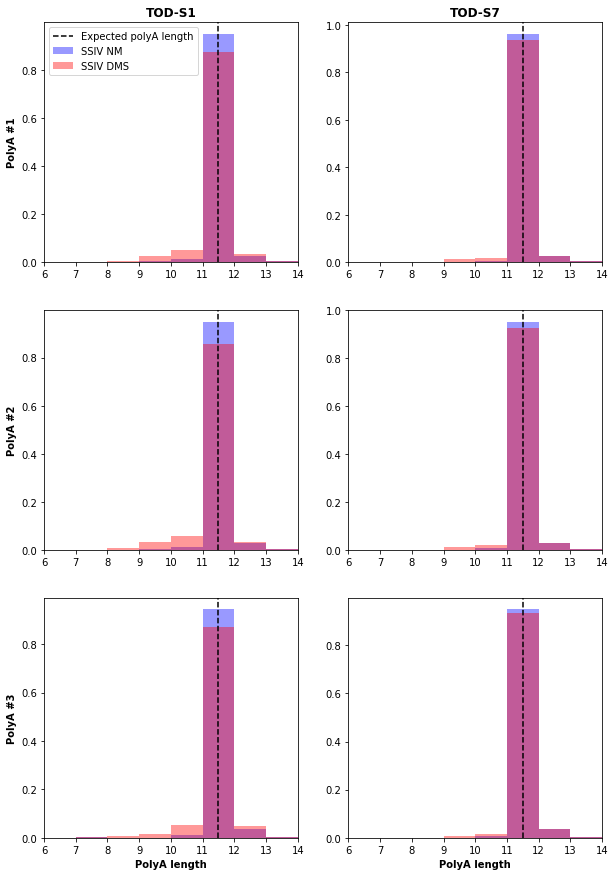

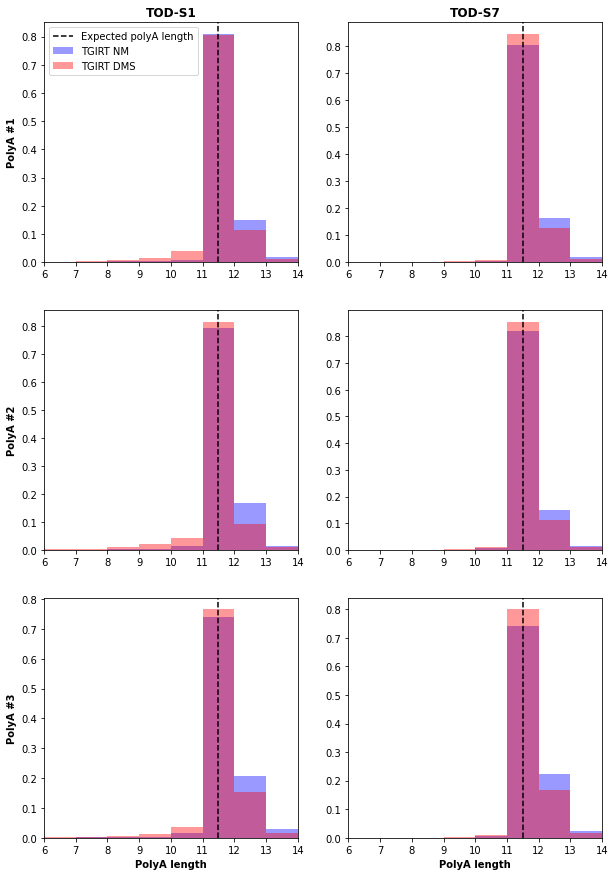

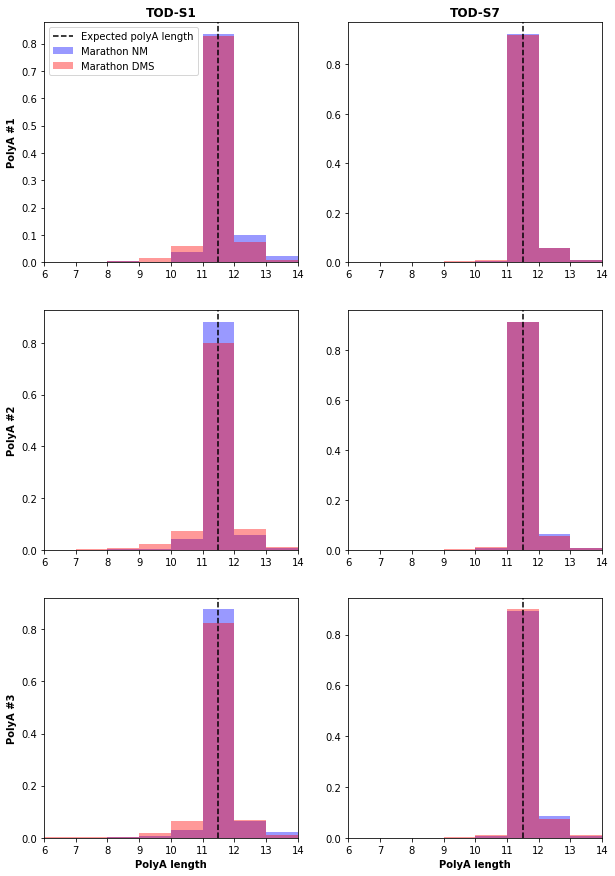

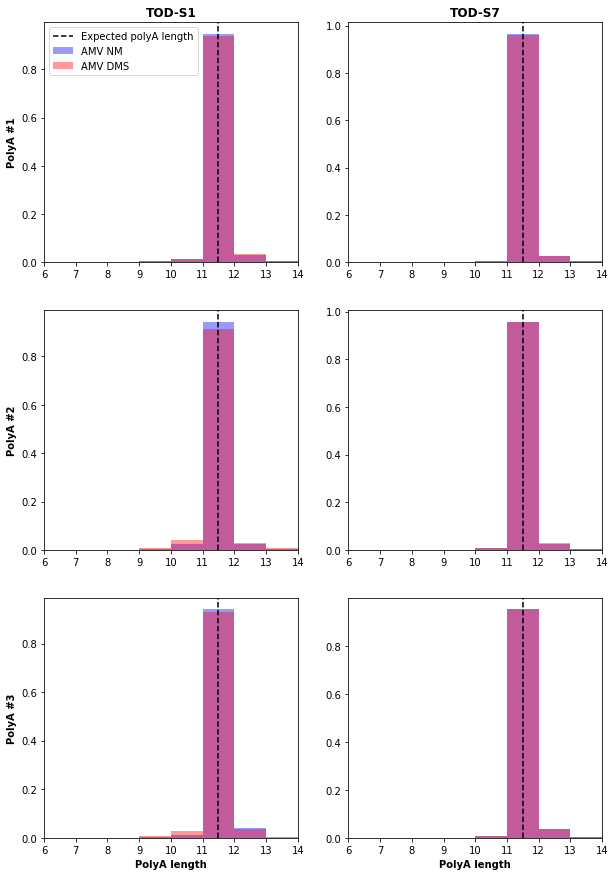

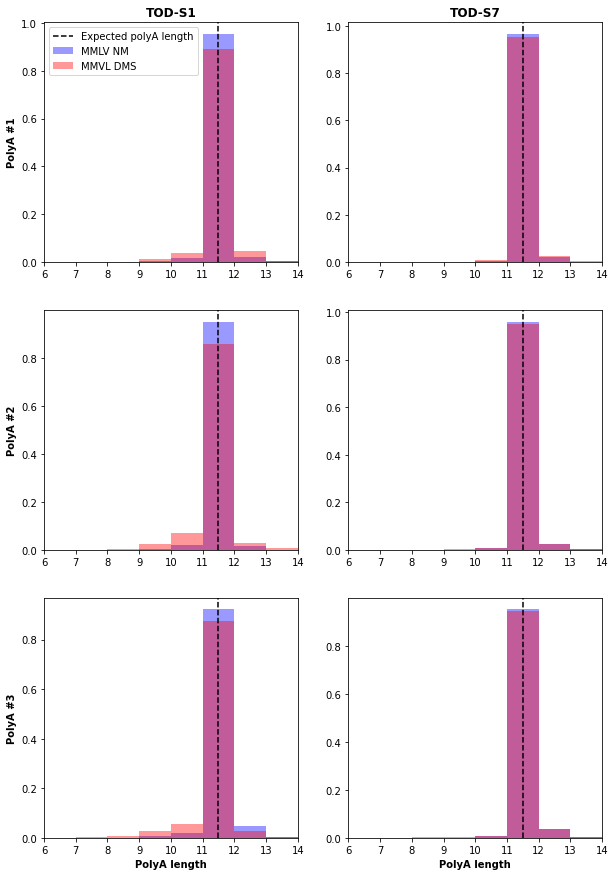

In [24]:
# Make polyA length histograms for S1 vs S7

S1_pairs = list(zip(S1_experiments[0::2], S1_experiments[1::2]))
S7_pairs = list(zip(S7_experiments[0::2], S7_experiments[1::2]))

for i in range(len(S1_pairs)):
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
    
    plot_polyA_lengths(S1_pairs[i], axs[0][0], 0)
    plot_polyA_lengths(S7_pairs[i], axs[0][1], 0)

    plot_polyA_lengths(S1_pairs[i], axs[1][0], 1)
    plot_polyA_lengths(S7_pairs[i], axs[1][1], 1)

    plot_polyA_lengths(S1_pairs[i], axs[2][0], 2)
    plot_polyA_lengths(S7_pairs[i], axs[2][1], 2)
    
    
    axs[0][0].set_ylabel('PolyA #1', fontweight='bold')
    axs[1][0].set_ylabel('PolyA #2', fontweight='bold') 
    axs[2][0].set_ylabel('PolyA #3', fontweight='bold')
    
    axs[2][0].set_xlabel('PolyA length', fontweight='bold')
    axs[2][1].set_xlabel('PolyA length', fontweight='bold')

    axs[0][0].legend()
    axs[0][0].set_title('TOD-S1', fontweight='bold')
    axs[0][1].set_title('TOD-S7', fontweight='bold')
    plt.savefig('plots/' + S1_pairs[i][0]['Name'].split(' ')[0] + '_polyA_lengths_TODS1vsTODS7')

Now that we have this data plotted, we also dump it out into CSVs for any downstream processing.

In [28]:
# Save all polyA length counts to CSV files.

import pandas as pd
data = {}
for i, experiment in enumerate(S1_experiments):
    name = experiment['Name']

    for i in range(1,4):
        counts = np.zeros(100)
        for pa in experiment['polyA_sequences']:
            counts[len(pa[i - 1])] += 1
        data[name + '_' + str(i)] = counts
    
pd.DataFrame(data).to_csv('tables/S1_polyA_lengths.csv')


data = {}
for i, experiment in enumerate(S7_experiments):
    name = experiment['Name']

    for i in range(1,4):
        counts = np.zeros(100)
        for pa in experiment['polyA_sequences']:
            counts[len(pa[i - 1])] += 1
        data[name + '_' + str(i)] = counts
    
    
pd.DataFrame(data).to_csv('tables/S7_polyA_lengths.csv')